In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
import cgs as cgs
from scipy import interpolate
import dwarf_model as dw_model
from initial_conditions import ic_list as icl ;
from matplotlib import rc

using cgs py
Loading IC for  Leo_T_burkert
Loading IC for  Leo_T
MUST SET A 'potential_type'
Loading IC for  LT_n020_v2_nh5
If M200 or n_o are not set, they will be solved for
using the profile choice
NFW solve M200, R200, rho_s, r_s, c 6.15304635648e+41 4.22478106861e+22 1.69442491018e-24 2.4531136761e+21 17.2221169764
Loading IC for  LT_n020_v2_nh4
If M200 or n_o are not set, they will be solved for
using the profile choice
NFW solve M200, R200, rho_s, r_s, c 6.15304635648e+41 4.22478106861e+22 1.69442491018e-24 2.4531136761e+21 17.2221169764
Loading IC for  LT_n020_v2_nh3
If M200 or n_o are not set, they will be solved for
using the profile choice
NFW solve M200, R200, rho_s, r_s, c 6.15304635648e+41 4.22478106861e+22 1.69442491018e-24 2.4531136761e+21 17.2221169764
Loading IC for  Leo_T_obs
Assuming primordial neutral for dwarf mu = 1.31
Assuming primordial ionized for halo mu = 0.6
If M200 or n_o are not set, they will be solved for
using the profile choice
NFW solve M200, R200, r

In [8]:
simulation_dir = '/home/emerick/Research/dwarfs/flash_runs/leo_T/'
model_name = "LT_n020_v4_nh4"
sim_mass   = model_name + '_cont_mass_1-25.dat'

In [9]:
initial_conditions = icl.ic_object_dict['LT_n020_v2_nh4']

In [10]:
anal_model = dw_model.analytical_dwarf(model_name, initial_conditions.ic)

In [12]:
anal_model.load_simulation_mass(simulation_dir +model_name +'/' + sim_mass)

In [14]:
anal_model.setup_orbit(0.0, initial_conditions.ic['n_halo'], 400.0E5)

(0, 800)

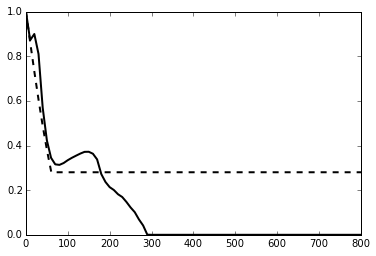

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)

t = np.linspace(0.0, 1000.0, 100.0)*cgs.Myr

shock_kwargs = {'RPS':{'alpha':3.85,'beta': 1.0,'method':'shock'},'KH':{'beta':5.}}

M , R = anal_model.evolve(t, ['RPS'], physics_kwargs=shock_kwargs)

ax.plot(anal_model.simulation_data['time'], anal_model.simulation_data['mass']/anal_model.simulation_data['mass'][0], label='9pc Sim', color='black',ls='-',lw=2)
#ax.plot(LT_n075_v2_nh3_cont['t'], LT_n075_v2_nh3_cont['m']/LT_n075_v2_nh3_cont['m'][0], label='9pc Sim - Cont', color='black',ls=':',lw=2)
ax.plot(t/cgs.Myr, M/M[0], label = 'Analytic', color='black',ls='--',lw=2)


plt.xlim(0,800)